In [1]:
## 1. Load libraries and set env 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from dateutil.parser import parse

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')


In [2]:
## 2. Load Dataset
DATA_DIR = "datasets"
DATA_FILE = "all_KE_CHVs_data_1493.csv" 

dataset = pd.read_csv( "%s/%s" % (DATA_DIR, DATA_FILE) )

x = dataset.shape ## <<< 1493 records, 21 variables 
print( "SHAPE: %d records, %d variables " % (x[0], x[1]))
dataset.head(2)

SHAPE: 1493 records, 21 variables 


,CHP ID,Pregnancy,PNC Visit Rate,PNC Visit Missed - #,Total U1 Assessments,Total U1 Treatments,Total U5 Assessments,Total U5 Treatments,U5 Malaria,U5 Diarrhea,...,On Time Referral f/u Treatment U5,Missed Visits,%mRDT,All Malaria Assessments,All Malaria Treatments,Act 6pack Issue,mRDT Used,Sales,Community Events,Households Registered
0,042d8caa-5ff0-4b35-8aac-80e7015a76e9,0,1.0,0,2,1,5,4,2,2,...,0.0,0,1.0,2,2,3,2,204.00,0,88
1,31ac0ec5-b051-46f8-87a5-70ea32470a7c,0,0.0,0,1,0,4,1,0,0,...,0.0,0,1.0,2,0,0,2,622.39,0,64


In [3]:
## 3. Data structure
print( "Missing Values?? --- ")
dataset.apply( lambda x: sum( x.isnull() ), axis=0)

Missing Values?? --- 


CHP ID                               0
Pregnancy                            0
PNC Visit Rate                       0
PNC Visit Missed - #                 0
Total U1 Assessments                 0
Total U1 Treatments                  0
Total U5 Assessments                 0
Total U5 Treatments                  0
U5 Malaria                           0
U5 Diarrhea                          0
U5 Pneumonia                         0
On Time Referral f/u Treatment U5    0
Missed Visits                        0
%mRDT                                0
All Malaria Assessments              0
All Malaria Treatments               0
Act 6pack Issue                      0
mRDT Used                            0
Sales                                0
Community Events                     0
Households Registered                0
dtype: int64

In [4]:
print("Variable Details")
dataset.dtypes


Variable Details


CHP ID                                object
Pregnancy                              int64
PNC Visit Rate                       float64
PNC Visit Missed - #                   int64
Total U1 Assessments                   int64
Total U1 Treatments                    int64
Total U5 Assessments                   int64
Total U5 Treatments                    int64
U5 Malaria                             int64
U5 Diarrhea                            int64
U5 Pneumonia                           int64
On Time Referral f/u Treatment U5    float64
Missed Visits                          int64
%mRDT                                float64
All Malaria Assessments                int64
All Malaria Treatments                 int64
Act 6pack Issue                        int64
mRDT Used                              int64
Sales                                float64
Community Events                       int64
Households Registered                  int64
dtype: object

In [5]:
## 4. Sample structure 
print( "No branch, district mappings.... Summarizing households/CHP")
dataset["Households Registered"].describe()

No branch, district mappings.... Summarizing households/CHP


count    1493.000000
mean       99.099799
std        48.424606
min         0.000000
25%        75.000000
50%       100.000000
75%       125.000000
max       356.000000
Name: Households Registered, dtype: float64

In [6]:
## 5. Summary Stats & Distributions 
print("Describe all << No need for fq b/c all numeric data for now ")
dataset.describe() 

Describe all << No need for fq b/c all numeric data for now 


,Pregnancy,PNC Visit Rate,PNC Visit Missed - #,Total U1 Assessments,Total U1 Treatments,Total U5 Assessments,Total U5 Treatments,U5 Malaria,U5 Diarrhea,U5 Pneumonia,On Time Referral f/u Treatment U5,Missed Visits,%mRDT,All Malaria Assessments,All Malaria Treatments,Act 6pack Issue,mRDT Used,Sales,Community Events,Households Registered
count,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000
mean,0.273275,0.128823,0.147354,0.814468,0.332887,3.612190,1.695244,1.004689,0.334226,0.356330,0.162677,0.154052,0.398802,2.000000,1.361688,2.697924,2.000000,308.410154,0.257200,99.099799
std,0.622685,0.327857,0.397362,1.305692,0.795242,4.411967,2.820636,2.155635,0.807231,0.943594,0.356414,0.560405,0.465617,3.840835,3.150672,7.020783,3.840835,1062.053645,0.692373,48.424606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2.000000,3.000000,146.560000,0.000000,125.000000
max,4.000000,1.000000,3.000000,9.000000,6.000000,25.000000,23.000000,18.000000,10.000000,10.000000,1.000000,7.000000,1.000000,41.000000,38.000000,99.000000,41.000000,18032.340000,7.000000,356.000000


- Average CHV size = 99 households. 
    - 75th is at 125 but max is 356. How's that? <<< Outliers or what?? TODO: review that and clean up 
- 

In [7]:
dataset["Pct.Malaria.In.U5.Assessments"] =  dataset["U5 Malaria"] / dataset["Total U5 Assessments"]
dataset["Pct.Diarrhoea.In.U5.Assessments"] =  dataset["U5 Diarrhea"] / dataset["Total U5 Assessments"]
dataset["Pct.Pneumonia.In.U5.Assessments"] =  dataset["U5 Pneumonia"] / dataset["Total U5 Assessments"]
dataset["Pct.All.Malaria.Treated"] =  dataset["All Malaria Treatments"] / dataset["All Malaria Assessments"]
dataset.describe() 

,Pregnancy,PNC Visit Rate,PNC Visit Missed - #,Total U1 Assessments,Total U1 Treatments,Total U5 Assessments,Total U5 Treatments,U5 Malaria,U5 Diarrhea,U5 Pneumonia,...,All Malaria Treatments,Act 6pack Issue,mRDT Used,Sales,Community Events,Households Registered,Pct.Malaria.In.U5.Assessments,Pct.Diarrhoea.In.U5.Assessments,Pct.Pneumonia.In.U5.Assessments,Pct.All.Malaria.Treated
count,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,...,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,862.000000,862.000000,862.000000,667.000000
mean,0.273275,0.128823,0.147354,0.814468,0.332887,3.612190,1.695244,1.004689,0.334226,0.356330,...,1.361688,2.697924,2.000000,308.410154,0.257200,99.099799,0.266591,0.118356,0.111890,inf
std,0.622685,0.327857,0.397362,1.305692,0.795242,4.411967,2.820636,2.155635,0.807231,0.943594,...,3.150672,7.020783,3.840835,1062.053645,0.692373,48.424606,0.319969,0.219375,0.205974,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.250000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.138095,0.000000,0.000000,0.666667
75%,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,2.000000,1.000000,0.000000,0.000000,...,1.000000,2.000000,3.000000,146.560000,0.000000,125.000000,0.500000,0.166667,0.166667,1.000000
max,4.000000,1.000000,3.000000,9.000000,6.000000,25.000000,23.000000,18.000000,10.000000,10.000000,...,38.000000,99.000000,41.000000,18032.340000,7.000000,356.000000,1.000000,1.000000,1.000000,inf


- malaria, diarrhoea and pneumonia collectively account for about 27+12+11 = 50% of all U5 assessments. What is the other 50% given that the three are priority areas??


Missing data 
- Why only 862 records on the % U5 entries?? and only 667 in all malaria. 

Distribution of households registered


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000217E0F62BE0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000217E13128D0>]], dtype=object)

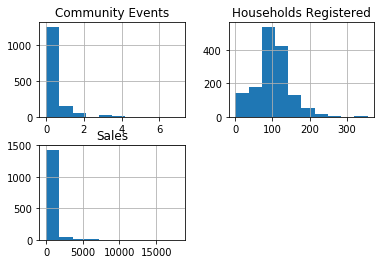

In [8]:
print( "Distribution of households registered")
dataset[["Households Registered", "Sales", "Community Events"]].hist(stacked=True)

Distribution of assessments


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000217E194F518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000217E1BE4CF8>]], dtype=object)

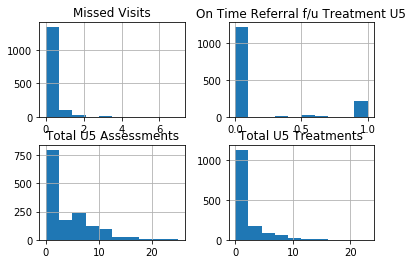

In [10]:
print( "Distribution of assessments")
dataset[["Total U5 Assessments", "Total U5 Treatments", "On Time Referral f/u Treatment U5", "Missed Visits"]].hist(stacked=True)


All distributions are skewed towards low participation or activity level 
- TODO: treat all left tail "total U5 assessments" as outliers  


- U5 treated is skewed compared to assessed 
    - does it mean we're treating way less than we should based on # assessed? 
    - anything to do with us not recording no core diseases.
    - also if our core diseases are not drivers of treatment then what are we doing?
    -**what should be the benchmark conversion rate here???** 

In [11]:
## Referral Variables::: Total U5 Assessments, Total U5 Treatments, On Time Referral f/u Treatment U5, Missed Visits
, 

''

In [12]:
## 6. Correlations 
print( "Ops correlations")
dataset[["Households Registered", "Sales", "Community Events"]].corr()

Ops correlations


,Households Registered,Sales,Community Events
Households Registered,1.000000,0.130296,0.100606
Sales,0.130296,1.000000,0.144770
Community Events,0.100606,0.144770,1.000000


Sales is closely, despite lowly, correlated to both size of CHP and number of community events help. 
- It's more with community events held than with size of CHP <<< may be if we did more community events then we'd have even more sales??? 
- TODO: logit regression of sales and community events << sample issues though 


In [13]:
print( "Assessents Correlations")
dataset[["Total U5 Assessments", "Total U5 Treatments", "On Time Referral f/u Treatment U5", "Missed Visits"]].corr()

Assessents Correlations


,Total U5 Assessments,Total U5 Treatments,On Time Referral f/u Treatment U5,Missed Visits
Total U5 Assessments,1.000000,0.697116,0.397401,0.234808
Total U5 Treatments,0.697116,1.000000,0.327376,0.231976
On Time Referral f/u Treatment U5,0.397401,0.327376,1.000000,0.041971
Missed Visits,0.234808,0.231976,0.041971,1.000000


Nothing unexpected
- it's a serial linkage of the variables >> assess->treat->refer
- seek out relationship to missed visits instead??? What's a missed visit anyways? Should it come before or after f/u 
    - hmmm... the corr between on-time-referral and missed-visits quickly deterioriates; serial??
    
    
b/c the variables represent serial steps can we then say that: 70% p(get treated), then 33% Vs 40% p(on-time referral), then 4% Vs 23% p(missed visits) 
- TODO: Go back to the theory and apply correctly. Embaracing!!



- if 70% treated.corr(assessed) 
    - are there some disease types we're assessing for and not either doing anything about or doing someting about but outside this provided system?  OR 
    - may be there's a high case of "false posistives" by caregivers that CHP eliminates HF need.for??
    - So what should be the benchmark?
    - plus how do we quantify these interrelated impacts?? 
    


In [14]:
# malaria
print("Malaria correlations")
dataset[["U5 Malaria", "All Malaria Assessments", "All Malaria Treatments", "%mRDT", "mRDT Used", "Act 6pack Issue"]].corr()

Malaria correlations


,U5 Malaria,All Malaria Assessments,All Malaria Treatments,%mRDT,mRDT Used,Act 6pack Issue
U5 Malaria,1.000000,0.871211,0.886340,0.545584,0.871211,0.753405
All Malaria Assessments,0.871211,1.000000,0.942509,0.600374,1.000000,0.897925
All Malaria Treatments,0.886340,0.942509,1.000000,0.508043,0.942509,0.956938
%mRDT,0.545584,0.600374,0.508043,1.000000,0.600374,0.449386
mRDT Used,0.871211,1.000000,0.942509,0.600374,1.000000,0.897925
Act 6pack Issue,0.753405,0.897925,0.956938,0.449386,0.897925,1.000000


- Such strong correations within this group. Does it mean consistent and high adoption/usage?? 
    - If so, why? b/c well artriculated space with clear tools and actions plus HH behaviour that's more treatment seeking?? 
    
- All malaria treatments are accompanied with an MRDT application

- U5 malaria as strong driver for all malaria activities
    - May be b/c MNCH focus AND so we're not documenting what's happening with patiens not U5?? 

- May be Malaria is the one thing we're doing very well with.
    - should we keep selling the RDTs and drugs then? Demand is clearly there but more and easier impact if free access?
    - may be expand malaria care to all not just MNCH profiles and document accordingly << we know how to do it well and demand is there
    
    
- 
    
  


In [15]:
# Pregnancies 
print("Pregnancies correlations")
dataset[[ "Pregnancy", "PNC Visit Rate", "PNC Visit Missed - #"]].corr()

Pregnancies correlations


,Pregnancy,PNC Visit Rate,PNC Visit Missed - #
Pregnancy,1.000000,0.156295,-0.008453
PNC Visit Rate,0.156295,1.000000,-0.081498
PNC Visit Missed - #,-0.008453,-0.081498,1.000000


- PNV visits -vely correlated to # of pregnancies <<< Increasing # of pregoz --> decreasing number of PNV visits missed --> increasing number of PNC visits. Okay. 
    - BUT the correlation value is soooo low to mean that that correlation is not there??
    
    
    
- low magnitude between pregoz and PNV vist rates --> not doing well with PNC-visits activation? 
    



In [16]:
# disease types 
print("Disease types correlations")
dataset[["U5 Malaria", "U5 Diarrhea", "U5 Pneumonia", "Act 6pack Issue"]].corr()

Disease types correlations


,U5 Malaria,U5 Diarrhea,U5 Pneumonia,Act 6pack Issue
U5 Malaria,1.000000,0.183598,0.170854,0.753405
U5 Diarrhea,0.183598,1.000000,0.284386,0.142239
U5 Pneumonia,0.170854,0.284386,1.000000,0.100333
Act 6pack Issue,0.753405,0.142239,0.100333,1.000000


- stronger corr between dirrhoea and pneumonia 
    - 
    
- low magnitudes of the corr --> no clear relationships between the diseases 


In [17]:
## 7. Explore relationships between non-related-themes data 
print("TODO: using subset of data where left-skewed tail of total U5 assessments is remove" )

TODO: using subset of data where left-skewed tail of total U5 assessments is remove


In [18]:
print("Correlate Pregoz with other assessments AND Referral f/u")
dataset[[ "Pregnancy", "PNC Visit Rate", "Total U1 Assessments" , "Total U5 Assessments", "On Time Referral f/u Treatment U5"]].corr()


Correlate Pregoz with other assessments AND Referral f/u


,Pregnancy,PNC Visit Rate,Total U1 Assessments,Total U5 Assessments,On Time Referral f/u Treatment U5
Pregnancy,1.000000,0.156295,0.261076,0.265491,0.227603
PNC Visit Rate,0.156295,1.000000,0.223268,0.280487,0.165571
Total U1 Assessments,0.261076,0.223268,1.000000,0.770173,0.441827
Total U5 Assessments,0.265491,0.280487,0.770173,1.000000,0.397401
On Time Referral f/u Treatment U5,0.227603,0.165571,0.441827,0.397401,1.000000


- PNC visit rates highest corr with U5 assessments --> 
    - are HH with other kids more likely to do PNC-visits? 
    
    
- Referral f/u highest corr with U1 (and so U5 assessments) and lowers for PNV visit rates 
    - **U1 algorithim as key driver to referral visits of kids?** 
    - referral follows happen mostly for sick kids? 
    - PNC visits activation needs work
    
- Are home visits for pregnancy registration driven more by sick kids I.E. CHP learns of and registers pregoz iff within HH they are providing care to kids already
    - **if a HH has no kids is it, then, least unlikely for a CHP to learn about new mothers/families/HHs?** 
        - Equity Lens data --> CHWs already targeting poorer households for some reason. Poorer and less educated households more likely to have pregnancy registration in 1st or 2nd trimester + ANC visits are motivated by danger signs?? 
        
    
    

In [19]:
print( "correlate pregoz, and disease types")
dataset[[ "Pregnancy", "PNC Visit Rate", "On Time Referral f/u Treatment U5", "U5 Malaria", "U5 Diarrhea", "U5 Pneumonia"]].corr()

correlate pregoz, and disease types


,Pregnancy,PNC Visit Rate,On Time Referral f/u Treatment U5,U5 Malaria,U5 Diarrhea,U5 Pneumonia
Pregnancy,1.000000,0.156295,0.227603,0.163824,0.175525,0.170671
PNC Visit Rate,0.156295,1.000000,0.165571,0.132705,0.173392,0.150138
On Time Referral f/u Treatment U5,0.227603,0.165571,1.000000,0.207582,0.236409,0.302144
U5 Malaria,0.163824,0.132705,0.207582,1.000000,0.183598,0.170854
U5 Diarrhea,0.175525,0.173392,0.236409,0.183598,1.000000,0.284386
U5 Pneumonia,0.170671,0.150138,0.302144,0.170854,0.284386,1.000000


- Pregoz is more correlated with referral activity of a child. 
    - Does it support early question on **whether CHPs are less likely to identify new mothers/families/households** b/c no child care required by them (yet)? 
    
- Referral activity for U5 is highest corr with pneumonia followed by diarrhea

- Again, this may be a function of our data structure and quality, but, the magnitudes are rather low --> which **suggests no clear relationship between the assessed diseases and why we do referral** if those are our focus areas -- **are we doing lots of referrals for non-core-diseases** 
    - recall: Malaria, Diarrhea and Pneumonia make up 50% of all U5 assessments. 
    - what are the other 50% assessments? Could they be the bigger reason for referrals?
- 